# Linear Regression with one variable

<b>Brief:</b> We are a CEO of a large food truck franchise and we are considering cities to send more food trucks (if I had a food truck franchise, my food trucks would serve pierogei). Obviously, we want to find a way to maximise our profit. Fortunately we already have food trucks dishing out hot dumplings in several cities, so we can examine the data from these and predict the profits of future trucks. Since we have this training dataset, this is a supervised learning rather than an unsupervised learning task. Our dataset includes the population sizes of the cities where we already have food trucks, and our profits from each of these cities. Since we only have one input variable (population size) per output variable that we’re trying to predict (profits), this is univariate (as opposed to multivariate) linear regression. Here’s what the data looks like on a scatter plot

## Plotting Data

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("./Data/ex1data1.txt", header = None) #read from dataset

x = data.iloc[:,0] #Population of City in 10,000s
y = data.iloc[:,1] #Profit in $10,000

m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


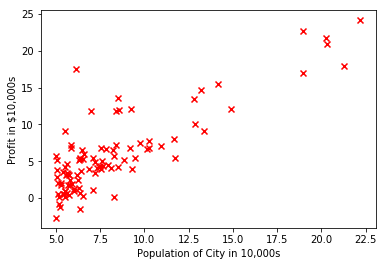

In [14]:
plt.scatter(x,y, marker ='x', color= 'r')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

As you can see, profits increase with increasing city size. But how can we predict how much profit future food trucks will make? We’ll have to fit a regression line summarises our past data.

## Hypothesis
For linear regression with one variable, our hypothesis function will be of the form:
\begin{equation*}
h_{\theta}(x) = \theta_0 + \theta_1x_1
\end{equation*}

where the hypothesis $h_{\theta}(x)$ is given by the linear model
\begin{equation*}
h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1
\end{equation*}


# The Cost Function

We shall use <b>Cost Function</b> which quantifies how much our prediction hθ(x) deviates from the actual value of y. So we want to find the values for $\theta_0$ and $\theta_1$ that will make the output from our cost function as small as possible.

The cost function that we used here was the mean squared error:
\begin{equation*}
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_{\theta} (x^{(i)})-y^{(i)})^2
\end{equation*}

In [15]:
# adding the intercept term

X = x[:,np.newaxis]
y = y[:,np.newaxis]

ones = np.ones((m,1)) 
X = np.hstack((ones, X))

In [16]:
theta = np.zeros([2,1])

In [17]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCost(X, y, theta)
print(J)

32.072733877455676


## Gradient Descent

The gradient descent algorithm updates the values for $\theta_0$ and $\theta_1$ in the direction that minimises $J(\theta_0,\theta_1)$:
\begin{equation*}
\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1)
\end{equation*}

When applied specifically to linear regression, the gradient descent algorithm can be derived like this:

\begin{equation*}
\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^m (h_{\theta} (x^{(i)})-y^{(i)})
\end{equation*}

\begin{equation*}
\theta_1 := \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^m (h_{\theta} (x^{(i)})-y^{(i)})x^i
\end{equation*}

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

In [20]:
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta

# initialize variables for learning rate and iterations
alpha = 0.01
iterations = 1000

theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.24140214]
 [ 1.1272942 ]]


We now have the optimized value of $\theta$ . Use this value in the above cost function.

In [11]:
J = computeCost(X, y, theta)
print(J)

32.072733877455676


## Visualizing

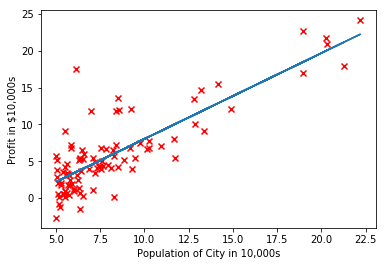

In [27]:
plt.scatter(x,y, marker ='x', color= 'r')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.show()

Thus the hyposthesis is

\begin{equation*}
h(\theta)= -3.63029144 + 1.16636235x
\end{equation*}